**This project, I wanted to analyze the relationship between income and education degree.**

**with Simple Linear Regression**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Income.csv",index_col= 0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
 1   Income     30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


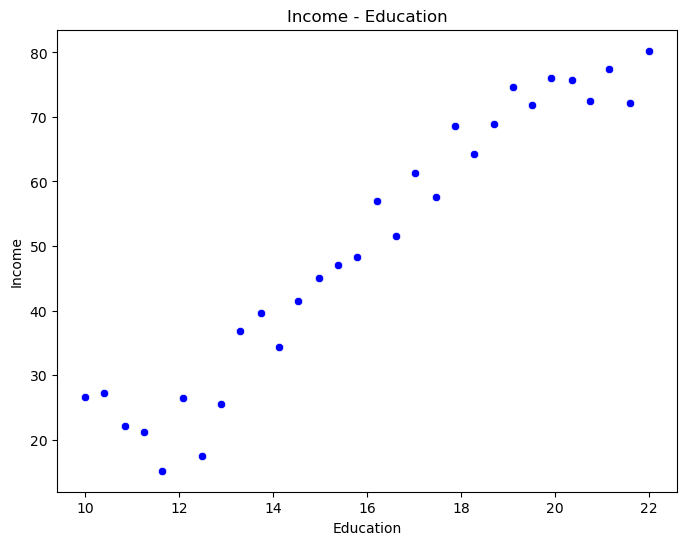

In [4]:
X = data["Education"]
y = data["Income"]
plt.figure(figsize=(8,6))
sns.scatterplot(data,x = "Education",y = "Income",color = "blue")
plt.title("Income - Education")
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
y_prediction = lr.predict(X_test)

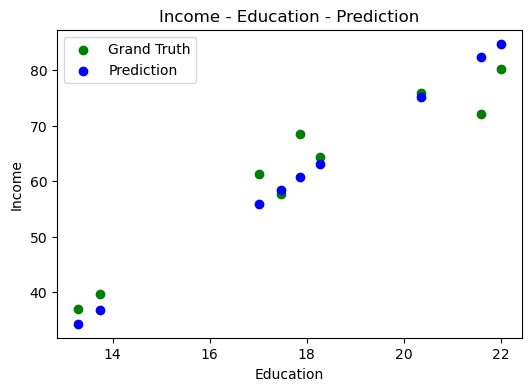

In [12]:
fig,ax = plt.subplots(figsize = (6,4))
ax.scatter(X_test,y_test,label = "Grand Truth",color = "green")
ax.scatter(X_test,y_prediction,label = "Prediction",color = "blue")

plt.title("Income - Education - Prediction")
plt.xlabel("Education")
plt.ylabel("Income")
plt.legend()
plt.show()

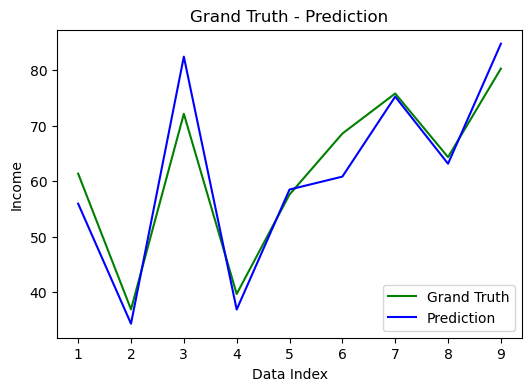

In [13]:
index = range(1,X_test.size+1)
fig,ax = plt.subplots(figsize = (6,4))

ax.plot(index,y_test,label = "Grand Truth",color = "green")
ax.plot(index,y_prediction,label = "Prediction",color = "blue")

plt.title('Grand Truth - Prediction')
plt.xlabel('Data Index')
plt.ylabel('Income')
plt.legend()
plt.show()

In [14]:
import numpy as np

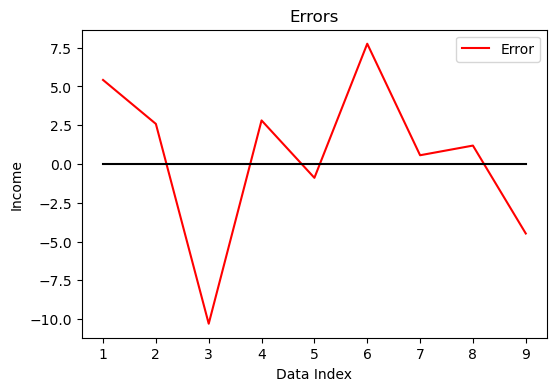

In [15]:
fig,ax = plt.subplots(figsize = (6,4))
ax.plot(index,y_test - y_prediction,label = "Error",color = "red")
ax.plot(index,np.zeros(len(index)),color = "black" )

plt.title('Errors')
plt.xlabel('Data Index')
plt.ylabel('Income')
plt.legend()
plt.show()

In [16]:
import statsmodels.api as sm

In [17]:
X_train_ols = sm.add_constant(X_train)

In [18]:
sm_model = sm.OLS(y_train,X_train_ols)

In [19]:
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     244.3
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.66e-12
Time:                        19:42:27   Log-Likelihood:                -66.267
No. Observations:                  21   AIC:                             136.5
Df Residuals:                      19   BIC:                             138.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.6804      5.768     -7.400      0.0

prediction function -> f(X) = -42,6804 + 5,7919X

R-squared = 0.928 -> %92.8 prediction value of Education degree.

As a result, we can say that the degree of education greatly affects Income.